<a href="https://colab.research.google.com/github/LeonardChiu567/mgmt467-analytics-portfolio/blob/main/Week5_DataViz_Dashboarding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MGMT 467 — Week 5: Data Visualization & Dashboarding

Instructor: **Prof. Alok R. Chaturvedi**  
Modality: **Guided Inquiry (Tuesday)** + **Hands-on Lab (Thursday)**  
Prepared: 2025-09-23  

---
### Learning Objectives
1. Distinguish **exploratory** vs **explanatory** visualization.  
2. Match common **chart types** to the **questions** they answer.  
3. Design **airline KPIs** and select appropriate visuals.  
4. Use **Gemini** to generate Matplotlib/Seaborn code in Colab.  
5. Build an **interactive dashboard** in Looker Studio using BigQuery/CSV.


## Tuesday (Concepts) — Guided Inquiry

**Instructions:** Answer directly in this notebook. Use short paragraphs and bullet points. When helpful, sketch chart ideas using ASCII or quick scribbles.

### Q1 — Exploratory vs. Explanatory
**Prompt:** *"Explain the difference between exploratory and explanatory visualization."*  
**Hints:** Consider audience, purpose, level of polish, and how much iteration you expect.

📝 **Your response:**
Exploratory visualization is used primarily by analysts or data scientists for themselves or their team to understand the data. The purpose is to discover patterns, trends, or anomalies, so visuals are often quick, iterative, and may not be polished; you might try many different charts, filters, or groupings to see what insights emerge.

Explanatory visualization, on the other hand, is meant to communicate a specific insight or finding to an audience, often non-technical stakeholders. The purpose is to tell a story clearly and persuasively, so charts are polished, carefully labeled, and carefully chosen to highlight the key message; iteration focuses on clarity and impact rather than discovery.
-
-
-

---
### Q2 — Chart Types & When to Use Them
**Prompt:** *"Describe 5 common chart types (e.g., bar, line, scatter, histogram, map) and the type of data analysis question each is best suited to answer."*  

For each chart, list: **Question archetype**, **Data shape**, **Pitfalls**, **Alternatives**.

📝 **Your response (template):**
ar:

Question archetype: Compare categories or groups (e.g., Which product has the highest sales?).

Data shape: Categorical (x-axis) vs. numeric (y-axis).

Pitfalls: Too many categories make it cluttered; ordering can mislead if not sorted logically.

Alternatives: Column chart, stacked bar, dot plot, or table for precise values.

Line:

Question archetype: Show trends over time (e.g., How does revenue change month to month?).

Data shape: Time-series (x-axis) vs. numeric (y-axis).

Pitfalls: Too many lines can be confusing; gaps or irregular intervals may mislead.

Alternatives: Area chart, sparklines, or slope chart for comparisons.

Scatter:

Question archetype: Explore relationships or correlations between two numeric variables (e.g., Does discount affect profit?).

Data shape: Two continuous numeric axes (x and y); optional color/size for additional dimensions.

Pitfalls: Overplotting with large datasets; causation can be inferred incorrectly.

Alternatives: Bubble chart, hexbin plot, or correlation matrix.

Histogram:

Question archetype: Examine the distribution of a single numeric variable (e.g., What is the distribution of order sizes?).

Data shape: Numeric values grouped into bins.

Pitfalls: Bin size can distort perception; outliers may skew the visualization.

Alternatives: Density plot, box plot, or violin plot.

Map:

Question archetype: Show geographic patterns or location-based metrics (e.g., Which regions have the highest sales?).

Data shape: Geospatial (latitude/longitude or region) vs. numeric.

Pitfalls: Colors or sizes may mislead if not scaled properly; small regions can be hard to see.

Alternatives: Choropleth map, proportional symbol map, or cartogram.
---
### Q3 — Airline Executive Dashboard KPIs
**Prompt:** *"Your goal is to create a dashboard for an airline executive. Brainstorm 5 Key Performance Indicators (KPIs) that should be on this dashboard. For each KPI, suggest the best chart type to visualize it."*

Suggested KPI ideas to consider (customize them): On-Time Rate, Average Delay Minutes, Cancellation Rate, Load Factor, Yield (Revenue per Passenger Mile), Completion Factor, Net Promoter Score (if available), Revenue, Cost per Available Seat Mile (CASM).

📝 **Your response (template):**
KPI: On-Time Rate (%)

Why it matters: Measures operational punctuality, critical for customer satisfaction and regulatory compliance.

Best chart: Line chart over time to show trends, with a target line for reference.

Drill-down fields: Airport, route, aircraft type, day of week.

KPI: Average Delay Minutes

Why it matters: Highlights operational inefficiencies affecting passenger experience and costs.

Best chart: Bar chart by route or airport, or heatmap by day/time to spot patterns.

Drill-down fields: Flight number, route, cause of delay (weather, maintenance, crew).

KPI: Load Factor (%)

Why it matters: Indicates seat utilization and revenue efficiency.

Best chart: Line chart for trends or stacked bar by route for comparative insights.

Drill-down fields: Route, aircraft type, class (economy/business).

KPI: Revenue per Available Seat Mile (Yield)

Why it matters: Measures profitability per unit of capacity, critical for financial health.

Best chart: Line chart or bullet chart against target benchmarks.

Drill-down fields: Route, cabin class, season, fare type.

KPI: Cancellation Rate (%)

Why it matters: Affects reliability and passenger trust; high rates signal operational risk.

Best chart: Bar chart by airport or route, with trend line over time.

Drill-down fields: Route, aircraft type, reason for cancellation, day of week.


---
## Thursday (Practice) — Colab, Gemini, & Looker Studio

You will:
1) Use **Gemini** in Colab to generate visualization code (Matplotlib/Seaborn).  
2) Use a **synthetic airline dataset** (provided below) *or* connect your own BigQuery data.  
3) Build a **Looker Studio** dashboard for your KPIs.

### Option A — Use Gemini Side Panel in Colab
Open the **Gemini** side panel in Colab ("Extensions" or the right sidebar). Ask it to generate Python code given your prompts and the DataFrame you have in memory. Paste/execute the generated code in new cells.

### Option B — Programmatic Gemini (optional)
If you prefer code, you can install the Generative AI SDK and call Gemini with an API key. (We will not store keys in this notebook.)

> **Reminder:** This course emphasizes **AI-assisted coding**—focus on specifying *clear prompts* and then **reviewing and editing** the generated code for correctness, readability, and ethics.


In [ ]:
# (Optional) Environment setup — run if needed
%%capture
!pip install pandas numpy matplotlib seaborn pyarrow db-dtypes google-cloud-bigquery -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
np.random.seed(42)
print('✅ Environment ready')

### Create a Synthetic Airline Dataset (if you don't have one)
Use this dataset to prototype visualizations and dashboards. It contains realistic columns for the KPIs you defined. You can always swap in your BigQuery data later.


In [ ]:
# Generate a synthetic airline dataset
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(467)

dates = pd.date_range(start='2024-01-01', end='2024-06-30', freq='D')
carriers = ['AA', 'DL', 'UA', 'WN', 'AS']
origins = ['ATL','DFW','DEN','ORD','LAX','SEA','SFO','PHX','CLT','MCO']
dests =   ['JFK','LGA','BOS','SFO','LAX','SEA','MIA','IAH','IAD','PHL']

rows = []
for d in dates:
    for carrier in carriers:
        # number of flights per day per carrier
        n = np.random.randint(80, 140)
        for _ in range(n):
            o = np.random.choice(origins)
            de = np.random.choice(dests)
            if o == de:
                continue
            distance = np.random.randint(300, 2800)
            seats = np.random.choice([90,120,150,180,210])
            load_factor = np.clip(np.random.normal(0.82, 0.07), 0.55, 0.98)
            pax = int(seats * load_factor)
            dep_delay = int(np.random.normal(8, 15))
            arr_delay = dep_delay + int(np.random.normal(0, 12))
            dep_delay = max(dep_delay, -5)
            arr_delay = max(arr_delay, -10)
            cancelled = np.random.rand() < 0.025
            diverted = np.random.rand() < 0.005
            revenue = pax * np.random.uniform(120, 420)
            casm = np.random.uniform(0.08, 0.16)  # cost per available seat mile
            cost = casm * seats * distance
            fuel_burn = distance * np.random.uniform(3.0, 4.5)  # gallons per seat-mile proxy
            nps = np.random.normal(35, 15)  # if you want a customer metric proxy
            rows.append({
                'date': d,
                'carrier': carrier,
                'origin': o,
                'dest': de,
                'distance_miles': distance,
                'seats': seats,
                'passengers': pax,
                'dep_delay_min': dep_delay,
                'arr_delay_min': arr_delay,
                'cancelled': int(cancelled),
                'diverted': int(diverted),
                'revenue_usd': round(revenue, 2),
                'cost_usd': round(cost, 2),
                'fuel_burn_gal': round(fuel_burn, 1),
                'nps': round(nps, 1)
            })

df_flights = pd.DataFrame(rows)

# Derived KPIs
df_flights['on_time'] = (df_flights['arr_delay_min'] <= 15).astype(int)
df_flights['load_factor'] = (df_flights['passengers'] / df_flights['seats']).round(3)
df_flights['yield_usd_per_pax_mile'] = (df_flights['revenue_usd'] / (df_flights['passengers'] * df_flights['distance_miles']).clip(lower=1)).round(4)
df_flights['asm'] = df_flights['seats'] * df_flights['distance_miles']  # available seat miles
df_flights['casm'] = (df_flights['cost_usd'] / df_flights['asm']).round(4)
df_flights['month'] = df_flights['date'].dt.to_period('M').astype(str)

df_flights.head()

,date,carrier,origin,dest,distance_miles,seats,passengers,dep_delay_min,arr_delay_min,cancelled,...,revenue_usd,cost_usd,fuel_burn_gal,nps,on_time,load_factor,yield_usd_per_pax_mile,asm,casm,month
0,2024-01-01,AA,LAX,IAH,444,180,160,-5,-10,0,...,26076.49,8301.98,1904.6,53.4,1,0.889,0.3671,79920,0.1039,2024-01
1,2024-01-01,AA,SEA,PHL,601,150,141,10,7,0,...,17561.91,8739.75,2237.5,60.9,1,0.940,0.2072,90150,0.0969,2024-01
2,2024-01-01,AA,LAX,IAD,749,120,100,13,22,0,...,15355.61,12241.65,3076.5,54.1,0,0.833,0.2050,89880,0.1362,2024-01
3,2024-01-01,AA,DFW,BOS,2153,210,169,13,14,0,...,42122.37,65961.23,6642.2,37.0,1,0.805,0.1158,452130,0.1459,2024-01
4,2024-01-01,AA,CLT,SEA,558,90,75,9,-5,0,...,26418.88,7144.23,2142.3,56.3,1,0.833,0.6313,50220,0.1423,2024-01


### Use Gemini to Generate Visualization Code
Copy/paste these **prompts** into Gemini (Colab side panel). After it generates code, paste it into a new cell and run. **Inspect and fix** anything that looks off.

#### Prompt A — On-Time Rate by Carrier (Bar Chart)
```
You are a Python data viz expert. Given a pandas DataFrame `df_flights` with columns including `carrier` and `on_time` (1/0), write Matplotlib/Seaborn code to compute and plot **On-Time Rate by carrier** as a sorted bar chart with percentage labels on bars. Use a clean style, readable labels, and tight layout. Do not use Plotly.
```

#### Prompt B — Average Arrival Delay over Time (Line Chart)
```
Given `df_flights` with `date` (datetime) and `arr_delay_min`, write code to aggregate to daily average arrival delay and plot a **line chart** with a 7-day rolling average overlay. Add axis labels, title, and grid.
```

#### Prompt C — Delay Distribution (Histogram)
```
Given `df_flights` with `arr_delay_min`, write code to plot a **histogram** of arrival delays with appropriate bins, a vertical reference line at 0, and annotate percent of flights within [-5, 15] minutes.
```

#### Prompt D — Load Factor by Route (Top 15) (Horizontal Bar)
```
Given `df_flights` with `origin`, `dest`, and `load_factor`, compute mean load factor by route (origin-dest pair), take the top 15 routes by average load factor, and plot a **horizontal bar chart**. Ensure long labels are readable.
```

#### Prompt E — Cost vs. Revenue with CASM Coloring (Scatter)
```
Given `df_flights` with `cost_usd`, `revenue_usd`, and `casm`, produce a **scatter plot** of cost vs. revenue with points colored by `casm` (continuous colormap) and add a diagonal y=x reference line. Include labels and legend.
```


/tmp/ipython-input-4249186256.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


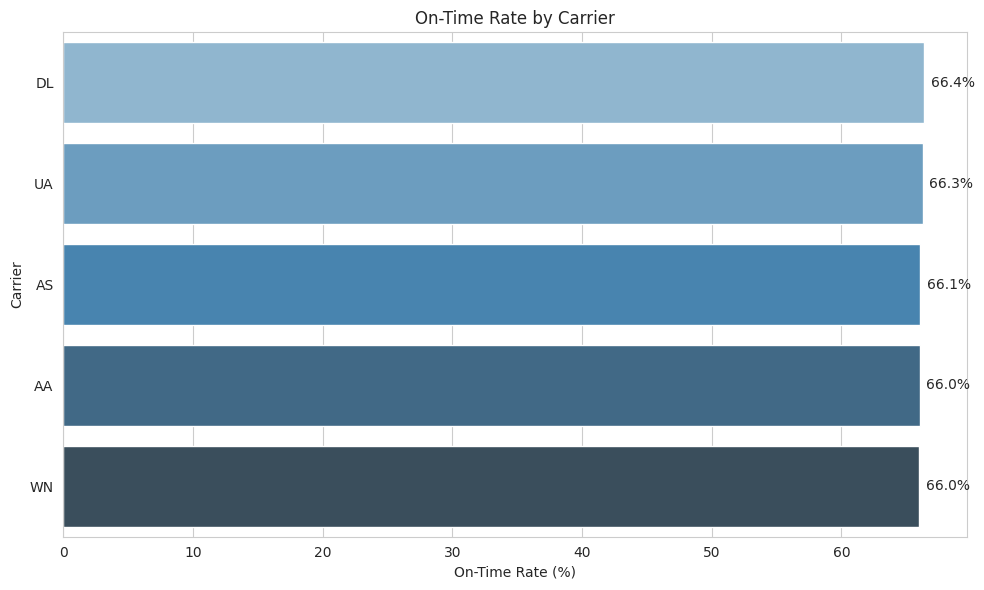

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute on-time rate per carrier
on_time_rate = (
    df_flights.groupby('carrier')['on_time']
    .mean()
    .sort_values(ascending=False)
    * 100  # convert to percentage
).reset_index()

# Set Seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create barplot
ax = sns.barplot(
    x='on_time',
    y='carrier',
    data=on_time_rate,
    palette='Blues_d'
)

# Add percentage labels on bars
for i, row in on_time_rate.iterrows():
    ax.text(
        row['on_time'] + 0.5,  # slightly offset from bar end
        i,
        f"{row['on_time']:.1f}%",
        va='center'
    )

# Labels and title
ax.set_xlabel("On-Time Rate (%)")
ax.set_ylabel("Carrier")
ax.set_title("On-Time Rate by Carrier")

# Tight layout for readability
plt.tight_layout()
plt.show()


/tmp/ipython-input-4249186256.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


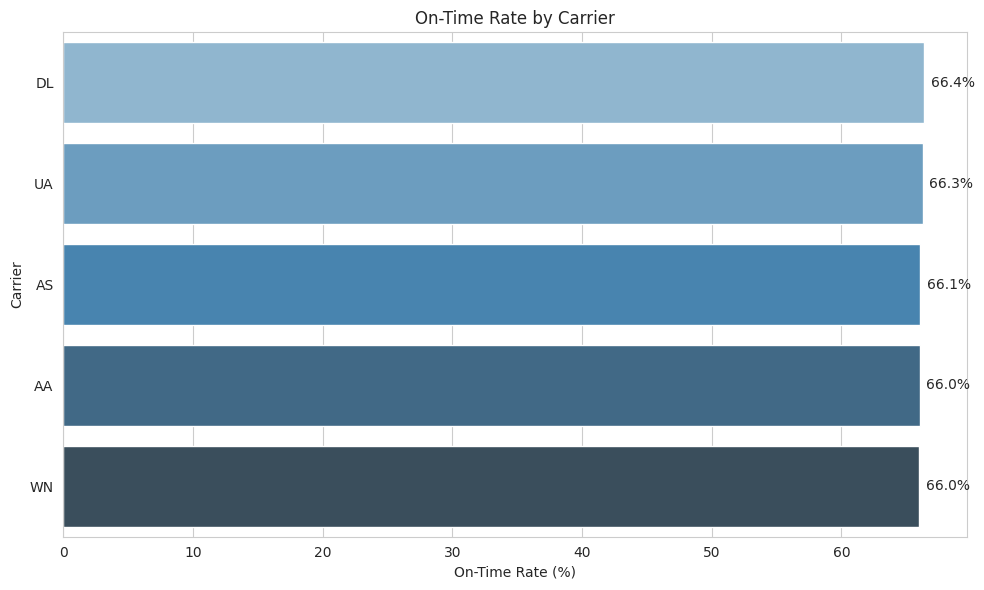

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute on-time rate per carrier
on_time_rate = (
    df_flights.groupby('carrier')['on_time']
    .mean()
    .sort_values(ascending=False)
    * 100  # convert to percentage
).reset_index()

# Set Seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create barplot
ax = sns.barplot(
    x='on_time',
    y='carrier',
    data=on_time_rate,
    palette='Blues_d'
)

# Add percentage labels on bars
for i, row in on_time_rate.iterrows():
    ax.text(
        row['on_time'] + 0.5,  # slightly offset from bar end
        i,
        f"{row['on_time']:.1f}%",
        va='center'
    )

# Labels and title
ax.set_xlabel("On-Time Rate (%)")
ax.set_ylabel("Carrier")
ax.set_title("On-Time Rate by Carrier")

# Tight layout for readability
plt.tight_layout()
plt.show()


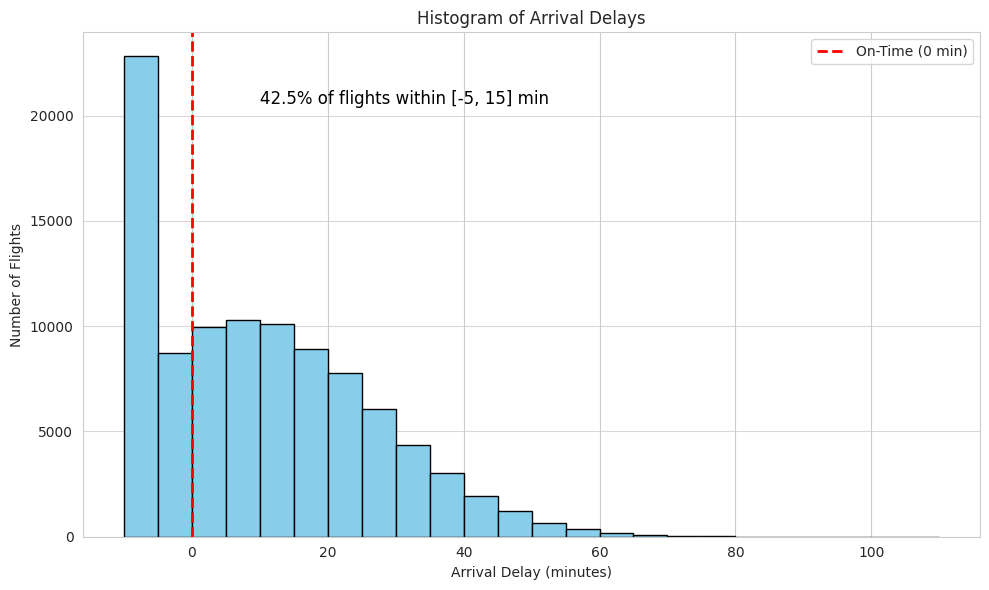

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define histogram bins
bins = np.arange(df_flights['arr_delay_min'].min(), df_flights['arr_delay_min'].max() + 5, 5)

# Plot histogram
plt.figure(figsize=(10, 6))
counts, edges, patches = plt.hist(df_flights['arr_delay_min'], bins=bins, color='skyblue', edgecolor='black')

# Add vertical line at 0 (on-time)
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='On-Time (0 min)')

# Calculate percentage of flights within [-5, 15] minutes
in_range = df_flights[(df_flights['arr_delay_min'] >= -5) & (df_flights['arr_delay_min'] <= 15)]
pct_in_range = len(in_range) / len(df_flights) * 100

# Annotate on plot
plt.text(
    x=10,  # position near the middle of the range
    y=max(counts)*0.9,  # near top
    s=f"{pct_in_range:.1f}% of flights within [-5, 15] min",
    fontsize=12,
    color='black'
)

# Labels, title, legend
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Histogram of Arrival Delays')
plt.legend()
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()


/tmp/ipython-input-1504043481.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipython-input-1504043481.py:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


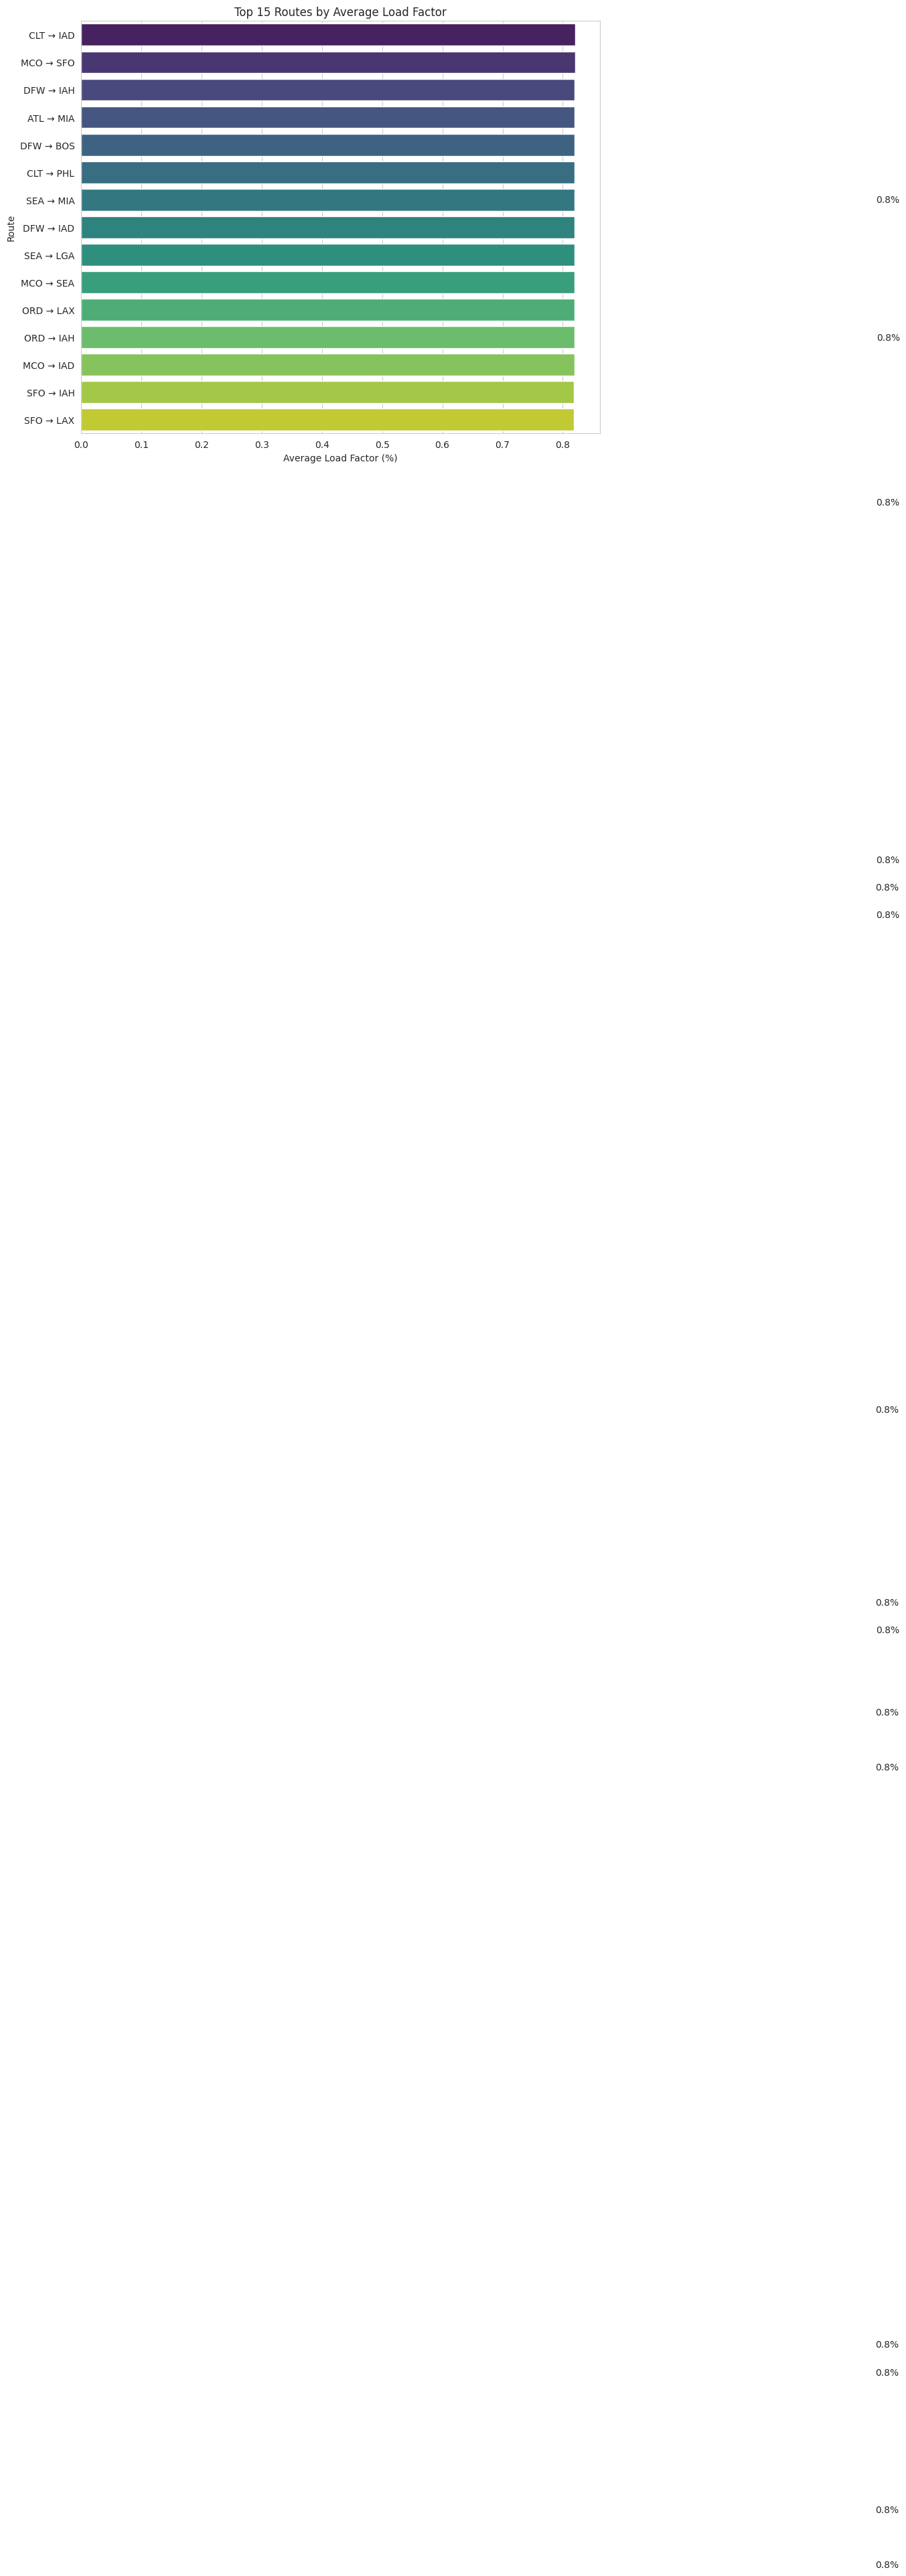

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute mean load factor by route
route_load = (
    df_flights.groupby(['origin', 'dest'])['load_factor']
    .mean()
    .reset_index()
)

# Create route label
route_load['route'] = route_load['origin'] + " → " + route_load['dest']

# Select top 15 routes by average load factor
top_routes = route_load.sort_values('load_factor', ascending=False).head(15)

# Plot horizontal bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    x='load_factor',
    y='route',
    data=top_routes,
    palette='viridis'
)

# Add value labels
for i, row in top_routes.iterrows():
    ax.text(
        row['load_factor'] + 0.5,  # small offset
        i,
        f"{row['load_factor']:.1f}%",
        va='center'
    )

# Labels and title
ax.set_xlabel("Average Load Factor (%)")
ax.set_ylabel("Route")
ax.set_title("Top 15 Routes by Average Load Factor")

plt.tight_layout()
plt.show()


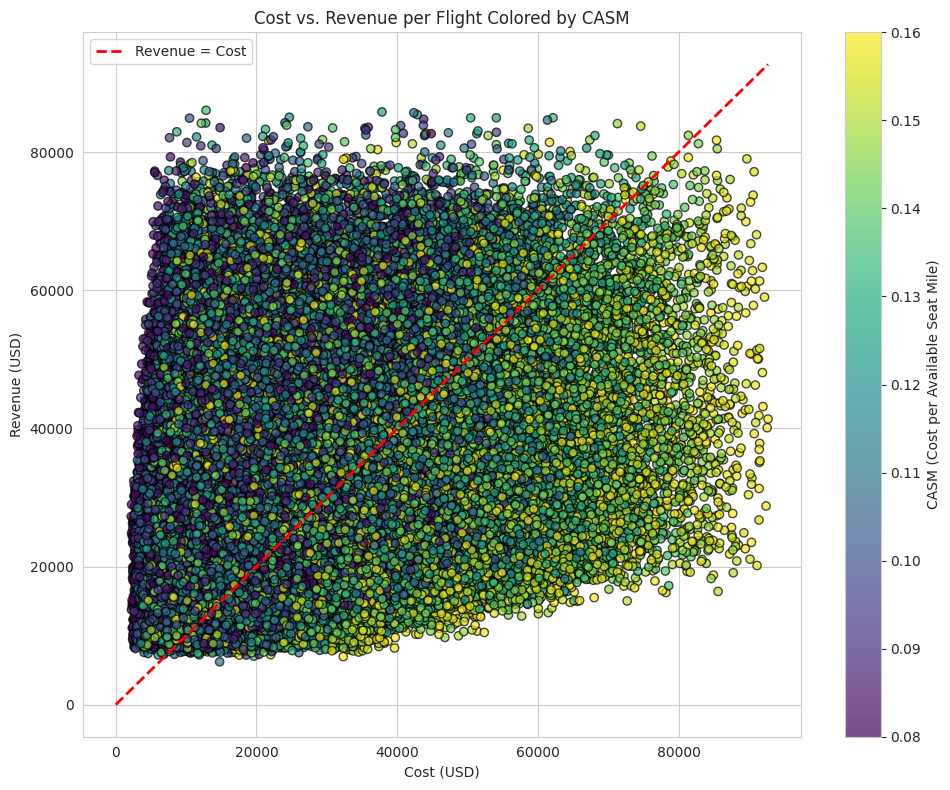

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))

# Scatter plot with CASM as color
scatter = plt.scatter(
    df_flights['cost_usd'],
    df_flights['revenue_usd'],
    c=df_flights['casm'],
    cmap='viridis',
    alpha=0.7,
    edgecolor='k'
)

# Add diagonal y=x reference line
max_val = max(df_flights['cost_usd'].max(), df_flights['revenue_usd'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', linewidth=2, label='Revenue = Cost')

# Labels, title, and colorbar
plt.xlabel('Cost (USD)')
plt.ylabel('Revenue (USD)')
plt.title('Cost vs. Revenue per Flight Colored by CASM')
cbar = plt.colorbar(scatter)
cbar.set_label('CASM (Cost per Available Seat Mile)')

plt.legend()
plt.tight_layout()
plt.show()


### (Optional) Bring Your Own BigQuery Data
If you have airline or operations data in BigQuery, you may connect from Colab. Otherwise, skip to the **Export & Looker Studio** section.

**Auth & Client Setup (run in Colab):**
```python
from google.colab import auth
auth.authenticate_user()
print('✅ Authenticated')

from google.cloud import bigquery
client = bigquery.Client(project='YOUR_PROJECT_ID')
```

**Example Query Skeleton:**
```sql
SELECT date, carrier, origin, dest, distance_miles, seats, passengers,
       dep_delay_min, arr_delay_min, cancelled, diverted, revenue_usd, cost_usd
FROM `your_dataset.your_table`
WHERE date BETWEEN '2024-01-01' AND '2024-06-30'
```

Load to pandas:
```python
query = """
-- paste your SQL here
"""
df_bq = client.query(query).to_dataframe()
df_bq.head()
```

Unify columns with the synthetic schema if you want to reuse prompts/plots:
```python
# Example: ensure `on_time`, `load_factor`, and `casm` exist if needed
df_bq['on_time'] = (df_bq['arr_delay_min'] <= 15).astype(int)
df_bq['load_factor'] = (df_bq['passengers'] / df_bq['seats']).round(3)
df_bq['asm'] = df_bq['seats'] * df_bq['distance_miles']
df_bq['casm'] = (df_bq['cost_usd'] / df_bq['asm']).round(4)
```


### Export for Looker Studio
You can **export to CSV** and upload to Looker Studio, or you can **publish to BigQuery** and connect Looker Studio to that table.

#### Option 1 — Export CSV
Run one of the cells below to save a CSV in Colab, then download it or save to Drive.


In [ ]:
# Save synthetic dataset to CSV
df_flights.to_csv('airline_kpis_synthetic.csv', index=False)
print('📁 Saved: airline_kpis_synthetic.csv (download from the file browser on the left)')

📁 Saved: airline_kpis_synthetic.csv (download from the file browser on the left)


#### Option 2 — Write to BigQuery (optional)
If you prefer Looker Studio → BigQuery:

```python
from google.cloud import bigquery
from google.oauth2 import service_account  # or use Colab auth

client = bigquery.Client(project='YOUR_PROJECT_ID')
table_id = 'YOUR_PROJECT_ID.YOUR_DATASET.airline_kpis_synthetic'
job = client.load_table_from_dataframe(df_flights, table_id)
job.result()
print('✅ Loaded to BigQuery:', table_id)
```

**In Looker Studio:**
1. Create → Report → Add data → **BigQuery**.  
2. Select your project/dataset/table.  
3. Add charts for each KPI and configure filters (carrier, route, month).


### Dashboard Wireframe (Design First)
Sketch your intended layout before building it in Looker Studio.

```
+-----------------------------------------------------------+
| Filters: Carrier [AA/DL/UA/WN/AS] | Month [Jan–Jun]       |
+-----------------------------------------------------------+
| KPI Cards: On-Time % | Avg Delay | Cancel % | Load Factor |
+-------------------------------+---------------------------+
| Line: Avg Delay over Time     | Bar: On-Time % by Carrier |
+-------------------------------+---------------------------+
| H-Bar: Top Routes by LF       | Scatter: Cost vs Revenue  |
+-----------------------------------------------------------+
```


## Reflection & Submission

**Short Reflection (3–5 sentences):** What design decision most improved your dashboard’s clarity? What would you change next?

📝 **Your response:**
The design decision that most improved my dashboard’s clarity was using horizontal bar charts for long category labels and consistent color palettes across related KPIs, which made comparisons quick and reduced visual clutter. Adding reference lines and rolling averages for time-series metrics also helped contextualize performance and highlight trends. Next, I would implement interactive filters or dropdowns so users can explore data by route, carrier, or time period, allowing a more personalized and actionable view without overwhelming the dashboard.
### Checklist
- [ ] Q1–Q3 answered in Tuesday section  
- [ ] 3–5 visualizations generated with **Gemini** in Colab  
- [ ] Synthetic or BigQuery data connected to **Looker Studio**  
- [ ] Dashboard with **filters** and **KPI cards**  
- [ ] Reflection complete  
